In [351]:
#Importing & printing our Student dataset
import pandas as pd
dataset = pd.read_csv(r'/content/StudentData.csv')
dataset

,Registration Number,Badge,Superbadge,Department,Batch,Examly status now
0,19BAI10089,1729,21479,B.Tech CSE - AI and ML,2023,23208.0
1,19BEE10029,4054,16179,B.Tech Electrical and Electronics Engineering,2023,20233.0
2,19BCE10302,1279,17684,B.Tech Computer Science and Engineering,2023,18963.0
3,19BCE10205,4430,12878,B.Tech Computer Science and Engineering,2023,17308.0
4,19BOE10046,1559,15264,B.Tech Bioengineering,2023,16823.0
...,...,...,...,...,...,...
1283,21MCA10147,-,-,MCA,2023,0.0
1284,-,-,-,MCA,2023,NaN
1285,-,-,-,MCA,2023,NaN
1286,-,-,-,MCA,2023,NaN


In [352]:
#Printing rows with NaN values
dataset[dataset.isna().any(axis=1)]

,Registration Number,Badge,Superbadge,Department,Batch,Examly status now
1284,-,-,-,MCA,2023,NaN
1285,-,-,-,MCA,2023,NaN
1286,-,-,-,MCA,2023,NaN
1287,-,-,-,MCA,2023,NaN


In [353]:
#Removing rows with NaN values
dataset = dataset.dropna()

#Changed column name of 'Examly status now' to 'ExamlyScore'
dataset = dataset.rename(columns={'Examly status now':'ExamlyScore'})

#Removing rows with ExamlyScore=0
#dataset = dataset[dataset.ExamlyScore!=0]

dataset

,Registration Number,Badge,Superbadge,Department,Batch,ExamlyScore
0,19BAI10089,1729,21479,B.Tech CSE - AI and ML,2023,23208.0
1,19BEE10029,4054,16179,B.Tech Electrical and Electronics Engineering,2023,20233.0
2,19BCE10302,1279,17684,B.Tech Computer Science and Engineering,2023,18963.0
3,19BCE10205,4430,12878,B.Tech Computer Science and Engineering,2023,17308.0
4,19BOE10046,1559,15264,B.Tech Bioengineering,2023,16823.0
...,...,...,...,...,...,...
1279,19BCG10068,-,-,B.Tech CSE - Gaming Technology,2023,0.0
1280,19BOE10034,-,-,B.Tech Bioengineering,2023,0.0
1281,19BCY10039,-,-,B.Tech CSE - Cyber Security & Digital Forensics,2023,0.0
1282,19BME10026,-,-,B.Tech Mechanical Engineering,2023,0.0


In [354]:
len(dataset)

1284

In [355]:
import numpy as np

#Adding column of CGPA
dataset["CGPA"] = np.round(np.random.uniform(5.0,10.0,len(dataset)),2)

#Adding column of Time based on ExamlyScore
def categoriseTime(row):  
    if row['ExamlyScore'] > 500 and row['ExamlyScore'] <= 1000:
        return np.round(np.random.uniform(2.0,4.0),2)
    elif row['ExamlyScore'] > 1000 and row['ExamlyScore'] <= 2000:
        return np.round(np.random.uniform(4.0,6.0),2)
    elif row['ExamlyScore'] > 2000 and row['ExamlyScore'] <= 5000:
        return np.round(np.random.uniform(6.0,8.0),2)
    elif row['ExamlyScore'] > 5000 and row['ExamlyScore'] <= 10000:
        return np.round(np.random.uniform(8.0,10.0),2)
    elif row['ExamlyScore'] > 10000:
        return np.round(np.random.uniform(10.0,12.0),2)
    return np.round(np.random.uniform(0.0,2.0),2)

dataset['Time'] = dataset.apply(lambda row: categoriseTime(row), axis=1)

#Adding columns of Class10 & Class12
dataset["Class10"] = np.round(np.random.uniform(40.0,100.0,len(dataset)),2)
dataset["Class12"] = np.round(np.random.uniform(40.0,100.0,len(dataset)),2)

#Adding column of Backlog based on CGPA
def categoriseBacklog(row):  
    if row['CGPA'] > 7.5:
        return 0
    return np.random.randint(0,2)

dataset['Backlog'] = dataset.apply(lambda row: categoriseBacklog(row), axis=1) 

#Adding column of 'Placement' based on ExamlyScore, CGPA & Backlog
def categorisePlacement(row):  
    if row['Backlog'] == 0 and row['CGPA'] >= 6:
        if row['ExamlyScore'] > 2000 and row['ExamlyScore'] <= 5000:
            return 'R'
        elif row['ExamlyScore'] > 5000 and row['ExamlyScore'] <= 10000:
            return 'D'
        elif row['ExamlyScore'] > 10000:
            return 'SD'
    return 'N'

dataset['Placement'] = dataset.apply(lambda row: categorisePlacement(row), axis=1)

dataset

,Registration Number,Badge,Superbadge,Department,Batch,ExamlyScore,CGPA,Time,Class10,Class12,Backlog,Placement
0,19BAI10089,1729,21479,B.Tech CSE - AI and ML,2023,23208.0,7.31,11.95,77.55,83.76,0,SD
1,19BEE10029,4054,16179,B.Tech Electrical and Electronics Engineering,2023,20233.0,5.77,10.06,61.88,90.91,0,N
2,19BCE10302,1279,17684,B.Tech Computer Science and Engineering,2023,18963.0,9.98,11.33,98.12,92.86,0,SD
3,19BCE10205,4430,12878,B.Tech Computer Science and Engineering,2023,17308.0,8.77,11.48,56.73,86.75,0,SD
4,19BOE10046,1559,15264,B.Tech Bioengineering,2023,16823.0,8.64,10.09,91.66,41.44,0,SD
...,...,...,...,...,...,...,...,...,...,...,...,...
1279,19BCG10068,-,-,B.Tech CSE - Gaming Technology,2023,0.0,6.99,0.68,96.40,60.40,1,N
1280,19BOE10034,-,-,B.Tech Bioengineering,2023,0.0,5.49,0.58,69.70,98.27,1,N
1281,19BCY10039,-,-,B.Tech CSE - Cyber Security & Digital Forensics,2023,0.0,5.47,0.03,62.72,66.17,1,N
1282,19BME10026,-,-,B.Tech Mechanical Engineering,2023,0.0,5.95,0.49,73.76,84.03,0,N


In [357]:
#Linear Regression using Time to predict ExamlyScore

X = dataset.iloc[:, [7]].values
y = dataset.iloc[:,[5]].values
print(X)
print(y)
#Split data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
print(X_train) 
print(X_test) 
print(y_train)
print(y_test)


[[11.95]
 [10.06]
 [11.33]
 ...
 [ 0.03]
 [ 0.49]
 [ 0.99]]
[[23208.]
 [20233.]
 [18963.]
 ...
 [    0.]
 [    0.]
 [    0.]]
[[6.65]
 [4.53]
 [4.82]
 ...
 [1.15]
 [4.75]
 [3.26]]
[[2.790e+00]
 [4.690e+00]
 [5.380e+00]
 [6.180e+00]
 [1.290e+00]
 [3.910e+00]
 [1.120e+00]
 [5.510e+00]
 [3.090e+00]
 [1.700e+00]
 [5.940e+00]
 [7.540e+00]
 [7.200e+00]
 [1.140e+00]
 [9.800e+00]
 [7.020e+00]
 [5.800e-01]
 [6.180e+00]
 [1.520e+00]
 [5.630e+00]
 [1.700e+00]
 [5.500e+00]
 [5.130e+00]
 [8.400e-01]
 [1.059e+01]
 [6.600e-01]
 [1.600e-01]
 [6.850e+00]
 [2.200e-01]
 [5.020e+00]
 [8.160e+00]
 [7.910e+00]
 [6.720e+00]
 [3.600e-01]
 [7.970e+00]
 [5.730e+00]
 [8.190e+00]
 [4.250e+00]
 [3.380e+00]
 [1.790e+00]
 [6.500e+00]
 [5.580e+00]
 [1.430e+00]
 [2.660e+00]
 [3.100e-01]
 [4.190e+00]
 [7.500e-01]
 [3.930e+00]
 [8.500e-01]
 [1.850e+00]
 [2.300e-01]
 [8.340e+00]
 [5.100e-01]
 [7.490e+00]
 [1.640e+00]
 [4.000e+00]
 [3.800e-01]
 [9.200e-01]
 [4.870e+00]
 [5.300e+00]
 [7.940e+00]
 [2.720e+00]
 [5.630e+00]
 

In [358]:
#Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #we are creating object of the linearregression
regressor.fit(X_train, y_train)

LinearRegression()

In [359]:
#Make Prediction
y_pred = regressor.predict(X_test)

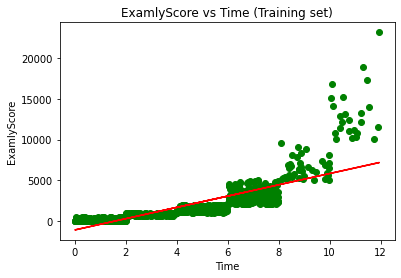

In [360]:
#Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'green')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('ExamlyScore vs Time (Training set)')
plt.xlabel('Time') #independent variable
plt.ylabel('ExamlyScore') #dependent variable
plt.show()

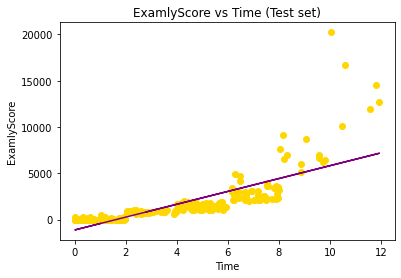

In [361]:
#Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'gold')
# plot the regression line (same as above)
plt.plot(X_test, regressor.predict(X_test), color='purple')
plt.title('ExamlyScore vs Time (Test set)')
plt.xlabel('Time') #independent variable
plt.ylabel('ExamlyScore') #dependent variable
plt.show()

In [362]:
#Make new prediction
new_examlyscore_pred = np.round(regressor.predict([[9]]),1)
print('The predicted examly score of a person who puts in 9 hours daily is ',new_examlyscore_pred)

The predicted examly score of a person who puts in 9 hours daily is  [[5117.9]]


In [363]:
new_examlyscore_pred = np.round(regressor.predict([[10]]),1)
print('The predicted examly score of a person who puts in 10 hours daily is ',new_examlyscore_pred)

The predicted examly score of a person who puts in 10 hours daily is  [[5812.]]


In [364]:
new_examlyscore_pred = np.round(regressor.predict([[3]]),1)
print('The predicted examly score of a person who puts in 3 hours daily is ',new_examlyscore_pred)

The predicted examly score of a person who puts in 3 hours daily is  [[953.]]


In [365]:
#Logistic Regression to predict placement type using ExamlyScore, CGPA, Backlog
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [367]:
Dataset_Placement=dataset[["Placement"]].value_counts()
print(Dataset_Placement)

Placement
N            1065
R             164
D              32
SD             23
dtype: int64


In [368]:
X = dataset[["ExamlyScore","CGPA","Backlog"]]
y = dataset[["Placement"]]

print(list(X.columns.values))
print(X) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['ExamlyScore', 'CGPA', 'Backlog']
      ExamlyScore  CGPA  Backlog
0         23208.0  7.31        0
1         20233.0  5.77        0
2         18963.0  9.98        0
3         17308.0  8.77        0
4         16823.0  8.64        0
...           ...   ...      ...
1279          0.0  6.99        1
1280          0.0  5.49        1
1281          0.0  5.47        1
1282          0.0  5.95        0
1283          0.0  8.77        0

[1284 rows x 3 columns]
(1027, 3)
(257, 3)
(1027, 1)
(257, 1)


In [369]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [370]:
#Predicting the placement type for an individual with ExamlyScore=12000, CGPA=9.2, Backlog=0
a = model1.predict([[12000,9.2,0]])
a

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['SD'], dtype=object)

In [371]:
#Predicting the placement type for an individual with ExamlyScore=30000, CGPA=8.4, Backlog=0
b = model1.predict([[300000,8.4,0]])
b

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['SD'], dtype=object)

In [372]:
#Predicting the placement type for an individual with ExamlyScore=7500, CGPA=9.8, Backlog=0
c = model1.predict([[7500,9.8,0]])
c

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['D'], dtype=object)

In [373]:
#Predicting the placement type for an individual with ExamlyScore=12000, CGPA=6, Backlog=1
d = model1.predict([[3000,6,1]])
d

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['N'], dtype=object)

In [374]:
#Print model parameters
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-4.75244078 10.25659642  3.12694498 -8.63110061]
Coefficients: 
 [[ 4.40574014e-04  3.53520826e-01 -4.10272427e+00]
 [-1.18255778e-03 -6.13487230e-01  1.23514586e+01]
 [-2.77470947e-05 -1.50914041e-01 -2.65487893e+00]
 [ 7.69730912e-04  4.10880445e-01 -5.59385537e+00]]


[[224   2   0   0]
 [  9  13   0   0]
 [  0   4   0   0]
 [  0   0   1   4]]


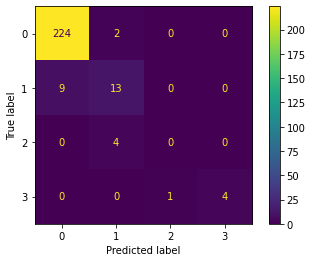

In [375]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
cm = confusion_matrix(y_test, preds, labels=["N","R","D","SD"])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


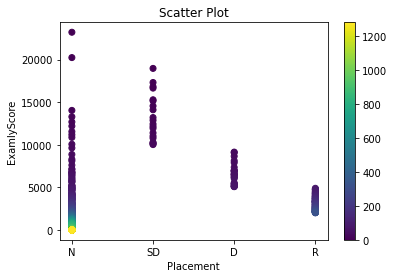

In [324]:
colors = np.array(range(0,1284))

plt.scatter(dataset['Placement'], dataset['ExamlyScore'], c=colors, cmap='viridis')

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('ExamlyScore')

plt.colorbar()

plt.show()


In [325]:
#placement_dict = {'N' : 1, 'R' : 2, 'D' : 3, 'SD' : 4}
#dataset['Placement'] = dataset['Placement'].map(placement_dict)

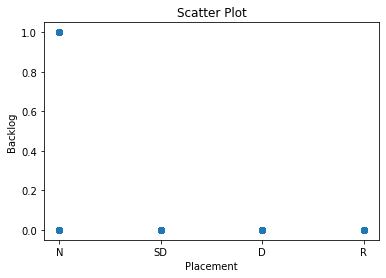

In [326]:
plt.scatter(dataset['Placement'], dataset['Backlog'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('Backlog')

plt.show()

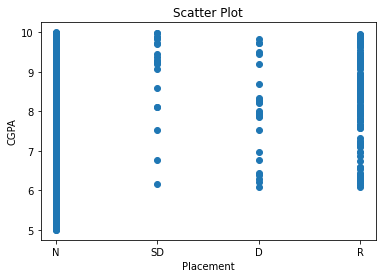

In [327]:
plt.scatter(dataset['Placement'], dataset['CGPA'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('CGPA')

plt.show()

In [328]:
#Removing rows with ExamlyScore=0 and Placement='N'
dataset = dataset[dataset.ExamlyScore!=0]
dataset = dataset[dataset.Placement!='N']

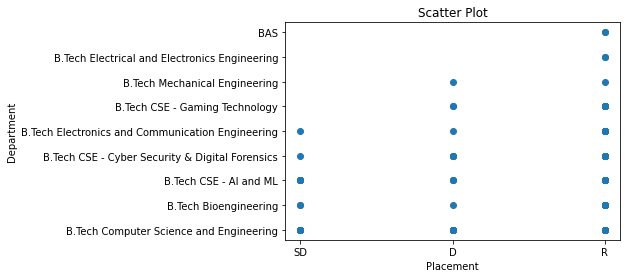

In [329]:
plt.scatter(dataset['Placement'], dataset['Department'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('Department')

plt.show()


In [330]:
dataset.Department.unique()

array(['B.Tech Computer Science and Engineering', 'B.Tech Bioengineering',
       'B.Tech CSE - AI and ML',
       'B.Tech CSE - Cyber Security & Digital Forensics',
       'B.Tech Electronics and Communication Engineering',
       'B.Tech CSE - Gaming Technology', 'B.Tech Mechanical Engineering',
       'B.Tech Electrical and Electronics Engineering', 'BAS'],
      dtype=object)

In [331]:
#Random Forest Classifier to predict placements based on department

department_dict = {'B.Tech CSE - AI and ML' : 1,
       'B.Tech Electrical and Electronics Engineering' : 2,
       'B.Tech Computer Science and Engineering' : 3, 'B.Tech Bioengineering' : 4,
       'B.Tech CSE - Gaming Technology' : 5,
       'B.Tech CSE - Cyber Security & Digital Forensics' : 6,
       'B.Tech Electronics and Communication Engineering' : 7,
       'B.Tech Mechanical Engineering' : 8, 'BAS' : 9, 'MCA' : 10,
       'M.Tech VLSI Design' : 11,
       'M.Tech CSE - Cyber Security & Digital forensics' : 12, 'MCF' : 13,
       'M.Tech Computer Science & Engineering' : 14}
dataset['Department'] = dataset['Department'].map(department_dict)

In [332]:
X = dataset[['Department']]
y = dataset[['Placement']]
print(X)
print(y)

     Department
2             3
3             3
4             4
5             1
6             3
..          ...
325           1
326           6
327           5
328           6
330           4

[191 rows x 1 columns]
    Placement
2          SD
3          SD
4          SD
5          SD
6          SD
..        ...
325         R
326         R
327         R
328         R
330         R

[191 rows x 1 columns]


In [376]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=101)
print(X_train)
print(X_test)
print(y_train)
print(y_test)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators = 120, criterion = 'entropy', max_depth = 10)
rf.fit (X_train, y_train)


      ExamlyScore  CGPA  Backlog
473        1476.0  5.99        0
791         730.0  7.68        0
990          15.0  7.31        1
910         187.0  6.15        0
1018          0.0  8.63        0
...           ...   ...      ...
575        1225.0  9.52        0
973          36.0  9.25        0
75         5137.0  9.52        0
599        1183.0  8.42        0
863         358.0  9.91        0

[642 rows x 3 columns]
      ExamlyScore  CGPA  Backlog
452        1532.0  5.15        1
147        3592.0  8.31        0
242        2545.0  8.05        0
1283          0.0  8.77        0
754         799.0  7.79        0
...           ...   ...      ...
83         4888.0  6.59        1
258        2438.0  9.07        0
234        2620.0  7.83        0
735         825.0  7.24        1
781         746.0  8.29        0

[642 rows x 3 columns]
     Placement
473          N
791          N
990          N
910          N
1018         N
...        ...
575          N
973          N
75           D
599       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=120)

In [334]:
y_pred_rf = rf.predict(X_test)
print (y_pred_rf)
print(y_pred_rf.shape)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'SD' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'SD' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'SD' 'R' 'SD' 'SD' 'R' 'SD' 'R' 'SD'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'SD' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R']
(96,)


In [335]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred_rf))
print (accuracy_score(y_test, y_pred_rf)*100)
print (classification_report(y_test, y_pred_rf))

[[ 0 16  1]
 [ 0 66  7]
 [ 0  6  0]]
68.75
              precision    recall  f1-score   support

           D       0.00      0.00      0.00        17
           R       0.75      0.90      0.82        73
          SD       0.00      0.00      0.00         6

    accuracy                           0.69        96
   macro avg       0.25      0.30      0.27        96
weighted avg       0.57      0.69      0.62        96



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
y_pred_rf = rf.predict([[1]])
print (y_pred_rf)

['R']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [337]:
y_pred_rf = rf.predict([[3]])
print (y_pred_rf)

['R']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


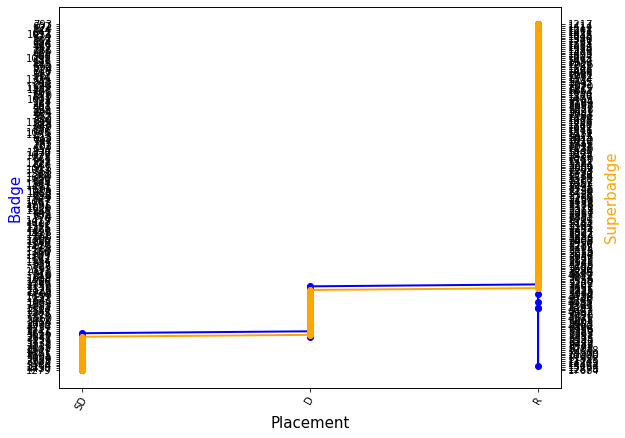

In [338]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[9, 7])

# Plotting the firts line with ax axes
ax.plot(dataset['Placement'],
        dataset['Badge'],
        color='b', linewidth=2, marker='o')
plt.xticks(rotation=60)
ax.set_xlabel('Placement', fontsize=15)
ax.set_ylabel('Badge',  color='blue', fontsize=15)

# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(dataset['Placement'],
         dataset['Superbadge'],
         color='orange', linewidth=2, marker='o')

ax2.set_ylabel('Superbadge', color='orange', fontsize=15)

plt.show()

In [339]:
#placement_dict = {'N' : 1, 'R' : 1, 'D' : 2, 'SD' : 3}
#dataset['Placement'] = dataset['Placement'].map(placement_dict)

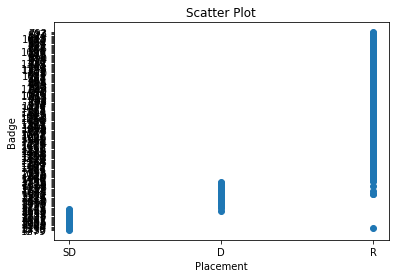

In [340]:
plt.scatter(dataset['Placement'], dataset['Badge'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('Badge')

plt.show()

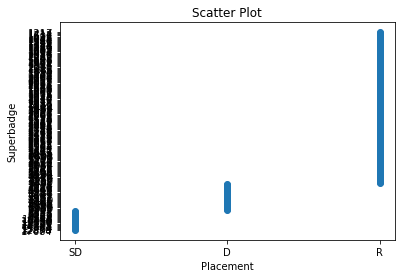

In [341]:
plt.scatter(dataset['Placement'], dataset['Superbadge'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('Superbadge')

plt.show()

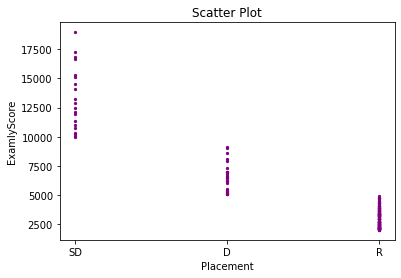

In [342]:
plt.scatter(dataset['Placement'], dataset['ExamlyScore'],color = 'purple',s=5)

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('ExamlyScore')

plt.show()

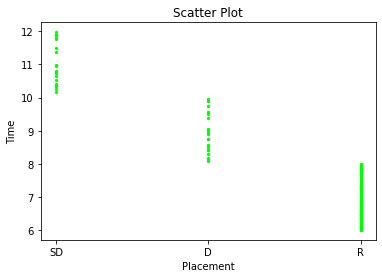

In [343]:
plt.scatter(dataset['Placement'], dataset['Time'],color = 'lime',s=5)

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('Time')

plt.show()

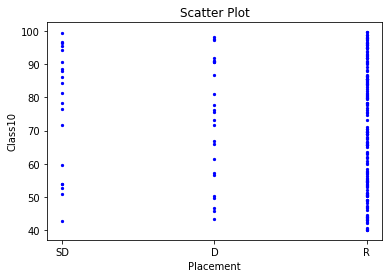

In [344]:
plt.scatter(dataset['Placement'], dataset['Class10'],color = 'blue',s=5)

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('Class10')

plt.show()

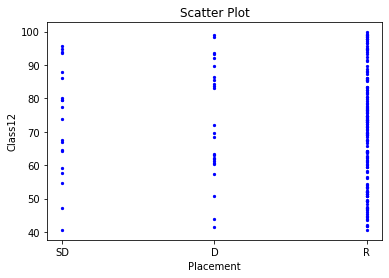

In [345]:
plt.scatter(dataset['Placement'], dataset['Class12'],color = 'blue',s=5)

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('Placement')
plt.ylabel('Class12')

plt.show()

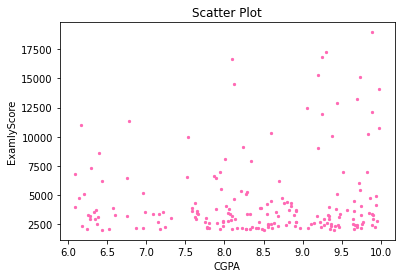

In [346]:
plt.scatter(dataset['CGPA'], dataset['ExamlyScore'],color = 'hotpink',s=5)

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('CGPA')
plt.ylabel('ExamlyScore')

plt.show()